In [1]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

# Define path to folder
#input_folder = r"L2_data/NLS/2018/L4/L41/L4132R.shp"

# Join folder path and filename
fp = os.path.join('', "m_L4132R_p.shp")

# Print out the full file path
print(fp)

m_L4132R_p.shp


In [3]:
data = gpd.read_file(fp)

In [4]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [5]:
data.head()

TEKSTI  RYHMA  LUOKKA  TASTAR  KORTAR  KORARV  KULKUTAPA    KOHDEOSO  \
0   None     64   32421    5000       0     0.0          0  1812247077   
1   None     64   32421    5000       0     0.0          0  1718796908   
2   None     64   32421   20000       0     0.0          0   411167695   
3   None     64   32421   20000       0     0.0          0   411173768   
4   None     64   32421   20000       0     0.0          0   411173698   

   AINLAHDE SYNTYHETKI  ... KARTOGLK  ALUEJAKOON  VERSUH  SUUNTA  SIIRT_DX  \
0         1   20180125  ...        0           0       0       0         0   
1         1   20180120  ...        0           0       0       0         0   
2         1   20180120  ...        0           0       0       0         0   
3         1   20180120  ...        0           0       0       0         0   
4         1   20180120  ...        0           0       0       0         0   

   SIIRT_DY  KORKEUS  ATTR2  ATTR3  \
0         0      0.0      0      0   
1         0      0.0      0      0   
2         0      0.0      0      0   
3         0      0.0      0      0   
4         0      0.0      0      0   

                                            geometry  
0  POLYGON ((379394.248 6689991.936, 379389.790 6...  
1  POLYGON ((378980.811 6689359.377, 378983.401 6...  
2  POLYGON ((378804.766 6689256.471, 378817.107 6...  
3  POLYGON ((379229.695 6685025.111, 379233.366 6...  
4  POLYGON ((379825.199 6685096.247, 379829.651 6...  

[5 rows x 21 columns]

In [6]:
data = data[['RYHMA', 'LUOKKA',  'geometry']]
colnames = {'RYHMA':'GROUP', 'LUOKKA':'CLASS'}
data.rename(columns=colnames, inplace=True)

In [7]:
data.head()

GROUP  CLASS                                           geometry
0     64  32421  POLYGON ((379394.248 6689991.936, 379389.790 6...
1     64  32421  POLYGON ((378980.811 6689359.377, 378983.401 6...
2     64  32421  POLYGON ((378804.766 6689256.471, 378817.107 6...
3     64  32421  POLYGON ((379229.695 6685025.111, 379233.366 6...
4     64  32421  POLYGON ((379825.199 6685096.247, 379829.651 6...

In [8]:
data.columns

Index(['GROUP', 'CLASS', 'geometry'], dtype='object')

In [9]:
print("Number of rows", len(data['CLASS']))
print("Number of classes", data['CLASS'].nunique())
print("Number of groups", data['GROUP'].nunique())

Number of rows 4311
Number of classes 20
Number of groups 1


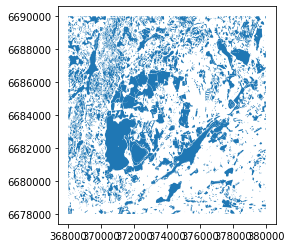

In [10]:
data.plot()

In [11]:
print("Polygon:", data.at[0, "geometry"])
print("Area:", round(data.at[0, "geometry"].area,0), "square meters")

Polygon: POLYGON ((379394.248 6689991.936, 379389.79 6690000, 379408.646 6690000, 379394.248 6689991.936))
Area: 76.0 square meters


In [12]:
# Iterate over rows and print the area of a Polygon
for index, row in data[0:5].iterrows():

    # Get the area from the shapely-object stored in the geometry-column
    poly_area = row['geometry'].area

    # Print info
    print("Polygon area at index {index} is: {area:.2f} m^2".format(index=index, area=poly_area))

Polygon area at index 0 is: 76.03 m^2
Polygon area at index 1 is: 2652.05 m^2
Polygon area at index 2 is: 3185.65 m^2
Polygon area at index 3 is: 13075.17 m^2
Polygon area at index 4 is: 3980.68 m^2


In [13]:
data.area.head()

0       76.027392
1     2652.054186
2     3185.649995
3    13075.165279
4     3980.682621
dtype: float64

In [14]:
# Create a new column called 'area' and assign the area of the Polygons into it
data['area'] = data.area

In [15]:
# Maximum area
max_area = data['area'].max()
# Minimum area
min_area = data['area'].min()
# Mean area
mean_area = data['area'].mean()

In [16]:
print("Max area: {maximum} square meters".format(maximum=round(max_area, 0)))
print("Min area: {minimum} square meters".format(minimum=round(min_area, 0)))
print("Mean area: {mean} square meters".format(mean=round(mean_area, 0)))

Max area: 4084558.0 square meters
Min area: 1.0 square meters
Mean area: 11522.0 square meters


In [17]:
# Select a class
selection = data.loc[data["CLASS"]==36200]

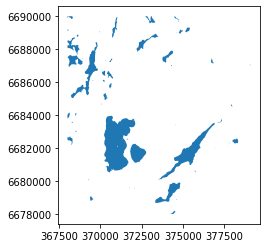

In [18]:
selection.plot();

In [19]:
# Create a output path for the data
#output_folder = r"L2_data/"
output_fp = os.path.join("", "Class_36200.shp")

In [20]:
# Write those rows into a new file (the default output file format is Shapefile)
selection.to_file(output_fp)

In [21]:
data.head()

GROUP  CLASS                                           geometry  \
0     64  32421  POLYGON ((379394.248 6689991.936, 379389.790 6...   
1     64  32421  POLYGON ((378980.811 6689359.377, 378983.401 6...   
2     64  32421  POLYGON ((378804.766 6689256.471, 378817.107 6...   
3     64  32421  POLYGON ((379229.695 6685025.111, 379233.366 6...   
4     64  32421  POLYGON ((379825.199 6685096.247, 379829.651 6...   

           area  
0     76.027392  
1   2652.054186  
2   3185.649995  
3  13075.165279  
4   3980.682621

In [22]:
data['CLASS'].uniqueque()

array([32421, 32200, 34300, 34100, 34700, 32500, 32112, 32111, 32611,
       32612, 32800, 32900, 35300, 35412, 35411, 35421, 33000, 33100,
       36200, 36313], dtype=int64)

In [23]:
# Group the data by class
grouped = data.groupby('CLASS')

# Let's see what we have
grouped

In [24]:
grouped.groups.keys()

dict_keys([32111, 32112, 32200, 32421, 32500, 32611, 32612, 32800, 32900, 33000, 33100, 34100, 34300, 34700, 35300, 35411, 35412, 35421, 36200, 36313])

In [25]:
# Iterate over the group object
for key, group in grouped:

    # Let's check how many rows each group has:
    print('Terrain class:', key)
    print('Number of rows:', len(group), "\n")

Terrain class: 32111
Number of rows: 1 

Terrain class: 32112
Number of rows: 1 

Terrain class: 32200
Number of rows: 2 

Terrain class: 32421
Number of rows: 110 

Terrain class: 32500
Number of rows: 2 

Terrain class: 32611
Number of rows: 257 

Terrain class: 32612
Number of rows: 11 

Terrain class: 32800
Number of rows: 80 

Terrain class: 32900
Number of rows: 28 

Terrain class: 33000
Number of rows: 5 

Terrain class: 33100
Number of rows: 118 

Terrain class: 34100
Number of rows: 3005 

Terrain class: 34300
Number of rows: 1 

Terrain class: 34700
Number of rows: 3 

Terrain class: 35300
Number of rows: 134 

Terrain class: 35411
Number of rows: 35 

Terrain class: 35412
Number of rows: 449 

Terrain class: 35421
Number of rows: 5 

Terrain class: 36200
Number of rows: 56 

Terrain class: 36313
Number of rows: 8 



In [26]:
grouped.head()

GROUP  CLASS                                           geometry  \
0        64  32421  POLYGON ((379394.248 6689991.936, 379389.790 6...   
1        64  32421  POLYGON ((378980.811 6689359.377, 378983.401 6...   
2        64  32421  POLYGON ((378804.766 6689256.471, 378817.107 6...   
3        64  32421  POLYGON ((379229.695 6685025.111, 379233.366 6...   
4        64  32421  POLYGON ((379825.199 6685096.247, 379829.651 6...   
...     ...    ...                                                ...   
4303     64  36313  POLYGON ((377127.305 6688073.257, 377116.045 6...   
4304     64  36313  POLYGON ((371141.897 6677999.999, 371139.757 6...   
4305     64  36313  POLYGON ((371498.720 6680399.799, 371497.585 6...   
4306     64  36313  POLYGON ((375668.607 6682942.062, 375671.489 6...   
4307     64  36313  POLYGON ((368411.063 6679328.990, 368411.424 6...   

              area  
0        76.027392  
1      2652.054186  
2      3185.649995  
3     13075.165279  
4      3980.682621  
...            ...  
4303   9619.307973  
4304  25266.167705  
4305    364.087680  
4306   2651.800270  
4307    376.503380  

[80 rows x 4 columns]

In [27]:
group.head()

GROUP  CLASS                                           geometry  \
4303     64  36313  POLYGON ((377127.305 6688073.257, 377116.045 6...   
4304     64  36313  POLYGON ((371141.897 6677999.999, 371139.757 6...   
4305     64  36313  POLYGON ((371498.720 6680399.799, 371497.585 6...   
4306     64  36313  POLYGON ((375668.607 6682942.062, 375671.489 6...   
4307     64  36313  POLYGON ((368411.063 6679328.990, 368411.424 6...   

              area  
4303   9619.307973  
4304  25266.167705  
4305    364.087680  
4306   2651.800270  
4307    376.503380

In [30]:
# Determine output directory
output_folder = "data/"

# Create a new folder called 'Results'
result_folder = os.path.join(output_folder, 'Results')

# Check if the folder exists already
if not os.path.exists(result_folder):
    # If it does not exist, create one
    os.makedirs(result_folder)

In [31]:
# Iterate over the groups
for key, group in grouped:
    # Format the filename
    output_name = "terrain_%s.shp" % str(key)

    # Print information about the process
    print("Saving file", os.path.basename(output_name))

    # Create an output path
    outpath = os.path.join(result_folder, output_name)

    # Export the data
    group.to_file(outpath)

Saving file terrain_32111.shp
Saving file terrain_32112.shp
Saving file terrain_32200.shp
Saving file terrain_32421.shp
Saving file terrain_32500.shp
Saving file terrain_32611.shp
Saving file terrain_32612.shp
Saving file terrain_32800.shp
Saving file terrain_32900.shp
Saving file terrain_33000.shp
Saving file terrain_33100.shp
Saving file terrain_34100.shp
Saving file terrain_34300.shp
Saving file terrain_34700.shp
Saving file terrain_35300.shp
Saving file terrain_35411.shp
Saving file terrain_35412.shp
Saving file terrain_35421.shp
Saving file terrain_36200.shp
Saving file terrain_36313.shp


In [32]:
area_info = grouped.area.sum().round()
area_info

CLASS
32111        1834.0
32112        2148.0
32200      105737.0
32421      702073.0
32500      109747.0
32611    13135597.0
32612      107343.0
32800     1465278.0
32900      617209.0
33000      659465.0
33100     3777595.0
34100    12381611.0
34300        1627.0
34700        2786.0
35300     1382940.0
35411      411198.0
35412     4710133.0
35421       67864.0
36200     9986966.0
36313       43459.0
Name: area, dtype: float64

In [33]:
# Create an output path
area_info.to_csv("terrain_class_areas.csv", header=True)